# Long Short-Term Memory (LSTM)

# Explanation

### What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

## imports to LSTM algoruthim

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

## Getting the data


In [2]:
sns.set(rc={'figure.figsize':(15,8)})

data = pd.read_csv('data/AirPassengers.csv',parse_dates=['Month'])

## Exploratory Data Analysis

In [3]:
f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    DateStartActuals=1949/1/1,
    DateEndActuals=1960/12/1,
    Freq='MS',
    ForecastLength=0,
    Xvars=[],
    Differenced=0,
    TestLength=1,
    ValidationLength=1,
    ValidationMetric='rmse',
    CILevel=0.95,
    BootstrapSamples=100
)


### PACF (Partial Auto Correlation Function) plot, which measures how much the "value" variable is correlated to past values of itself and how far back a statistically significant correlation exists

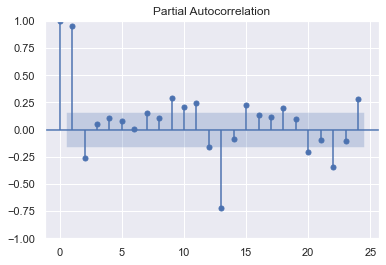

In [4]:
f.plot_pacf(lags=24)
plt.show()

# Decompose the series into its trend, seasonal, and residual parts

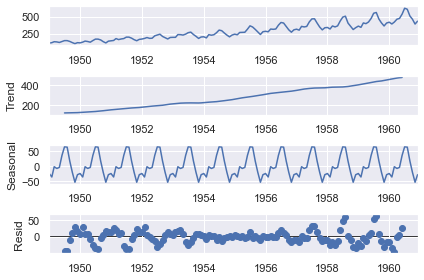

In [5]:
f.seasonal_decompose().plot()
plt.show()


In [6]:
f.adf_test(full_res=True)

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

# LSTM Forecasting

In [7]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

5/5 [==============================] - 0s 4ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

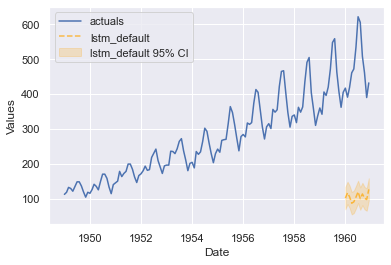

In [8]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

4/4 [==============================] - 0s 0s/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

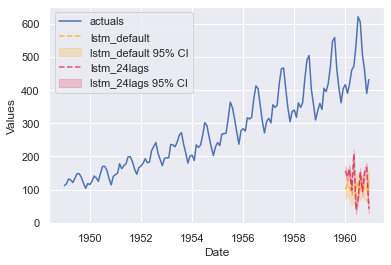

In [9]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 3s 475ms/step - loss: 0.4815 - val_loss: 0.1974
Epoch 2/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4708 - val_loss: 0.1902
Epoch 3/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4603 - val_loss: 0.1830
Epoch 4/5
3/3 [==============================] - 0s 31ms/step - loss: 0.4497 - val_loss: 0.1757
Epoch 5/5
1/1 [==============================] - 0s 486ms/step
Epoch 1/5
3/3 [==============================] - 3s 287ms/step - loss: 0.4626 - val_loss: 0.1766
Epoch 2/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4538 - val_loss: 0.1701
Epoch 3/5
3/3 [==============================] - 0s 23ms/step - loss: 0.4449 - val_loss: 0.1635
Epoch 4/5
3/3 [==============================] - 0s 19ms/step - loss: 0.4358 - val_loss: 0.1565
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

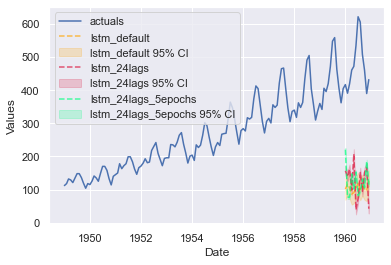

In [10]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
3/3 [==============================] - 7s 717ms/step - loss: 0.4773 - val_loss: 0.1899
Epoch 2/25
3/3 [==============================] - 0s 69ms/step - loss: 0.4578 - val_loss: 0.1778
Epoch 3/25
3/3 [==============================] - 0s 58ms/step - loss: 0.4400 - val_loss: 0.1645
Epoch 4/25
3/3 [==============================] - 0s 58ms/step - loss: 0.4205 - val_loss: 0.1485
Epoch 5/25
3/3 [==============================] - 0s 69ms/step - loss: 0.3964 - val_loss: 0.1303
Epoch 6/25
3/3 [==============================] - 0s 69ms/step - loss: 0.3657 - val_loss: 0.1206
Epoch 7/25
3/3 [==============================] - 0s 66ms/step - loss: 0.3301 - val_loss: 0.1267
Epoch 8/25
3/3 [==============================] - 0s 66ms/step - loss: 0.2963 - val_loss: 0.1423
Epoch 9/25
3/3 [==============================] - 0s 66ms/step - loss: 0.2732 - val_loss: 0.1512
Epoch 10/25
3/3 [==============================] - 0s 66ms/step - loss: 0.2509 - val_loss: 0.1509
Epoch 11/25
1/1 [===========

<AxesSubplot:xlabel='Date', ylabel='Values'>

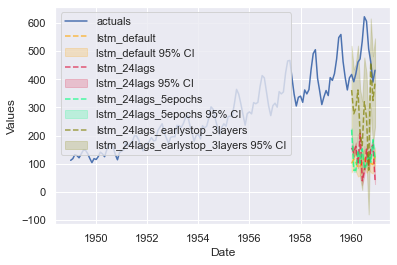

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
3/3 [==============================] - 8s 915ms/step - loss: 0.4838 - val_loss: 0.2030
Epoch 2/15
3/3 [==============================] - 0s 158ms/step - loss: 0.3886 - val_loss: 0.0756
Epoch 3/15
3/3 [==============================] - 1s 161ms/step - loss: 0.1778 - val_loss: 0.2241
Epoch 4/15
3/3 [==============================] - 1s 166ms/step - loss: 0.1655 - val_loss: 0.0708
Epoch 5/15
3/3 [==============================] - 1s 166ms/step - loss: 0.1298 - val_loss: 0.0541
Epoch 6/15
3/3 [==============================] - 1s 158ms/step - loss: 0.1388 - val_loss: 0.1077
Epoch 7/15
3/3 [==============================] - 1s 161ms/step - loss: 0.1228 - val_loss: 0.1574
Epoch 8/15
3/3 [==============================] - 1s 161ms/step - loss: 0.1217 - val_loss: 0.0958
Epoch 9/15
3/3 [==============================] - 1s 166ms/step - loss: 0.1114 - val_loss: 0.0647
Epoch 10/15
3/3 [==============================] - 1s 166ms/step - loss: 0.1117 - val_loss: 0.0675
Epoch 11/15
3/3 [==

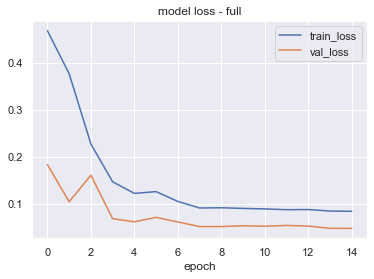

3/3 [==============================] - 0s 31ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

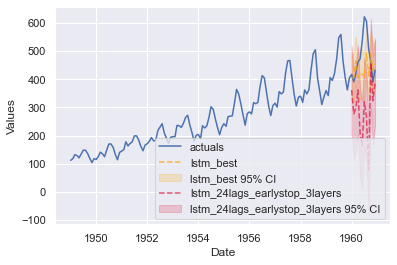

In [14]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)